In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten
import numpy as np

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train[0].shape

(28, 28)

In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [7]:
plt.matshow(X_train[0])

NameError: name 'plt' is not defined

In [ ]:
y_train[0]

In [ ]:
y_train[:5]

In [ ]:
X_train.shape

In [ ]:
X_train = X_train / 255
X_test  = X_test / 255

In [9]:
model = Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 104,938
Trainable params: 104,938
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [12]:
history = model.fit(X_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
1500/1500 [==============================] - 9s 5ms/step - loss: 1.8013 - accuracy: 0.6074 - val_loss: 0.7496 - val_accuracy: 0.7701
Epoch 2/25
1500/1500 [==============================] - 7s 4ms/step - loss: 0.6571 - accuracy: 0.8231 - val_loss: 0.4702 - val_accuracy: 0.8836
Epoch 3/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4017 - accuracy: 0.8933 - val_loss: 0.3635 - val_accuracy: 0.9178
Epoch 4/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2856 - accuracy: 0.9264 - val_loss: 0.2493 - val_accuracy: 0.9411
Epoch 5/25
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2087 - accuracy: 0.9457 - val_loss: 0.2292 - val_accuracy: 0.9481
Epoch 6/25
1500/1500 [==============================] - 7s 4ms/step - loss: 0.1685 - accuracy: 0.9563 - val_loss: 0.2458 - val_accuracy: 0.9501
Epoch 7/25
1500/1500 [==============================] - 7s 4ms/step - loss: 0.1548 - accuracy: 0.9596 - val_loss: 0.1905 - val_accuracy:

In [13]:
y_prob = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [14]:
y_pred = y_prob.argmax(axis=1)

In [15]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9674

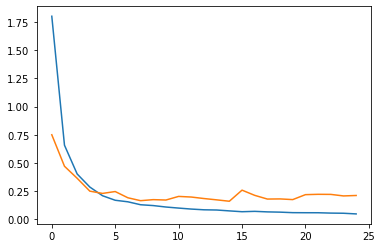

In [17]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

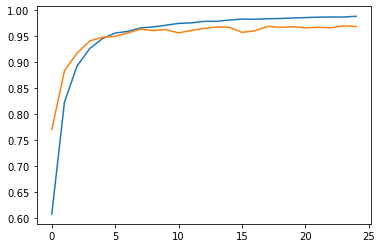

In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

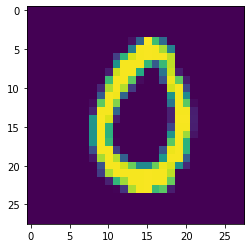

In [28]:
plt.imshow(X_test[1001])

In [29]:
model.predict(X_test[1001].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 31ms/step


array([0], dtype=int64)